# Imports

In [1]:
import importlib
import sys
import torch

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')

# Data

### Load Data Files

In [2]:
# Path to your pickle file (saved with torch.save)
file_path_train = '../../../../encoded_data/log_stand/BPIC_2017_all_lognormal_5_train.pkl'
# Load the dataset using torch.load
bpic17_train_dataset = torch.load(file_path_train, weights_only=False)
# Check the type of the loaded dataset
print(type(bpic17_train_dataset))

# Path to your pickle file (saved with torch.save)
file_path_val = '../../../../encoded_data/log_stand/BPIC_2017_all_lognormal_5_val.pkl'
# Load the dataset using torch.load
bpic17_val_dataset = torch.load(file_path_val, weights_only=False)
# Check the type of the loaded dataset
print(type(bpic17_val_dataset))

<class 'event_log_loader.new_event_log_loader.EventLogDataset'>


<class 'event_log_loader.new_event_log_loader.EventLogDataset'>


### Train Data Insights

In [3]:
# BPIC17 Dataset Categories, Features:

bpic17_all_categories = bpic17_train_dataset.all_categories

bpic17_all_categories_cat = bpic17_all_categories[0]
print(bpic17_all_categories_cat)

bpic17_all_categories_num = bpic17_all_categories[1]
print(bpic17_all_categories_num)

for i, cat in enumerate(bpic17_all_categories_cat):
     print(f"BPIC17 (5) Categorical feature: {cat[0]}, Index position in categorical data list: {i}")
     print(f"BPIC17 (5) Total Amount of Category labels: {cat[1]}")
print('\n')    
for i, num in enumerate(bpic17_all_categories_num):
     print(f"BPIC17 (5) Numerical feature: {num[0]}, Index position in categorical data list: {i}")
     print(f"BPIC17 (5) Amount Category Lables: {num[1]}")

[('concept:name', 28, {'A_Accepted': 1, 'A_Cancelled': 2, 'A_Complete': 3, 'A_Concept': 4, 'A_Create Application': 5, 'A_Denied': 6, 'A_Incomplete': 7, 'A_Pending': 8, 'A_Submitted': 9, 'A_Validating': 10, 'EOS': 11, 'O_Accepted': 12, 'O_Cancelled': 13, 'O_Create Offer': 14, 'O_Created': 15, 'O_Refused': 16, 'O_Returned': 17, 'O_Sent (mail and online)': 18, 'O_Sent (online only)': 19, 'W_Assess potential fraud': 20, 'W_Call after offers': 21, 'W_Call incomplete files': 22, 'W_Complete application': 23, 'W_Handle leads': 24, 'W_Personal Loan collection': 25, 'W_Shortened completion ': 26, 'W_Validate application': 27}), ('Action', 7, {'Created': 1, 'Deleted': 2, 'EOS': 3, 'Obtained': 4, 'Released': 5, 'statechange': 6}), ('org:resource', 151, {'EOS': 1, 'User_1': 2, 'User_10': 3, 'User_100': 4, 'User_101': 5, 'User_102': 6, 'User_103': 7, 'User_104': 8, 'User_105': 9, 'User_106': 10, 'User_107': 11, 'User_108': 12, 'User_109': 13, 'User_11': 14, 'User_110': 15, 'User_111': 16, 'User_112

### Input Features for Encoder and Decoder

In [4]:
# Create lists with name of Encoder features (input) and decoder features (input & output)

# Encoder features:
enc_feat_cat = []
enc_feat_num = []
for cat in bpic17_all_categories_cat:
    enc_feat_cat.append(cat[0])
for num in bpic17_all_categories_num:
    enc_feat_num.append(num[0])
enc_feat = [enc_feat_cat, enc_feat_num]
print("Input features encoder: ", enc_feat)

# Decoder features:
dec_feat_cat = ['concept:name', 'org:resource', 'lifecycle:transition']
dec_feat_num = ['case_elapsed_time', 'event_elapsed_time']
dec_feat = [dec_feat_cat, dec_feat_num]
print("Features decoder: ", dec_feat)

Input features encoder:  [['concept:name', 'Action', 'org:resource', 'EventOrigin', 'lifecycle:transition', 'case:LoanGoal', 'case:ApplicationType', 'Accepted', 'Selected'], ['day_in_week', 'seconds_in_day', 'case:RequestedAmount', 'FirstWithdrawalAmount', 'NumberOfTerms', 'MonthlyCost', 'CreditScore', 'case_elapsed_time', 'event_elapsed_time']]
Features decoder:  [['concept:name', 'org:resource', 'lifecycle:transition'], ['case_elapsed_time', 'event_elapsed_time']]


# Model

In [5]:
import model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model
importlib.reload(model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model)
from model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model import DropoutUncertaintyEncoderDecoderLSTM

# Prediction decoder output sequence length
seq_len_pred = 4

# Size hidden layer
hidden_size = 128

# Number of cells
num_layers = 4

# Fixed Dropout probability 
dropout = 0.1

# Encoder Decoder model initialization
model = DropoutUncertaintyEncoderDecoderLSTM(data_set_categories=bpic17_all_categories,
                                             enc_feat=enc_feat,
                                             dec_feat=dec_feat,
                                             seq_len_pred=seq_len_pred,
                                             hidden_size=hidden_size,
                                             num_layers=num_layers,
                                             dropout=dropout)

Data set categories:  ([('concept:name', 28, {'A_Accepted': 1, 'A_Cancelled': 2, 'A_Complete': 3, 'A_Concept': 4, 'A_Create Application': 5, 'A_Denied': 6, 'A_Incomplete': 7, 'A_Pending': 8, 'A_Submitted': 9, 'A_Validating': 10, 'EOS': 11, 'O_Accepted': 12, 'O_Cancelled': 13, 'O_Create Offer': 14, 'O_Created': 15, 'O_Refused': 16, 'O_Returned': 17, 'O_Sent (mail and online)': 18, 'O_Sent (online only)': 19, 'W_Assess potential fraud': 20, 'W_Call after offers': 21, 'W_Call incomplete files': 22, 'W_Complete application': 23, 'W_Handle leads': 24, 'W_Personal Loan collection': 25, 'W_Shortened completion ': 26, 'W_Validate application': 27}), ('Action', 7, {'Created': 1, 'Deleted': 2, 'EOS': 3, 'Obtained': 4, 'Released': 5, 'statechange': 6}), ('org:resource', 151, {'EOS': 1, 'User_1': 2, 'User_10': 3, 'User_100': 4, 'User_101': 5, 'User_102': 6, 'User_103': 7, 'User_104': 8, 'User_105': 9, 'User_106': 10, 'User_107': 11, 'User_108': 12, 'User_109': 13, 'User_11': 14, 'User_110': 15, 'U

# Loss Object Creation

In [6]:
import loss.losses
importlib.reload(loss.losses)
from loss.losses import Loss

loss_obj = Loss()

# Numerical features trained with log-normal loss:
log_normal_loss_num_feature = ['case_elapsed_time', 'event_elapsed_time']

# Training Configuration

In [ ]:
import trainer.trainer
importlib.reload(trainer.trainer)
from trainer.trainer import Trainer
from torch.optim.lr_scheduler import ReduceLROnPlateau

from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter(comment="Full_BPIC17_grad_lognormal")

# device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Start learning rate
learning_rate = 1e-6

# Optimizer and Scheduler
# optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate, weight_decay=0)
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=0)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, min_lr=1e-9)

# Epochs
num_epochs = 100

# Batch size
batch_size = 128

# lambda for L2 (weight, bias, dropout) regularization: According to formula: 1/2N
# regularization_term = 1.0/(2.0*batch_size)
regularization_term =  1e-4

# shuffle data
shuffle = True

# Teacher forcing: Smaller 0.5 more predicted events are used for next event prediction.
teacher_forcing_ratio = 0.8

optimize_values = {"regularization_term":regularization_term,
                   "optimizer":optimizer,
                   "scheduler": scheduler,
                   "epochs":num_epochs,
                   "mini_batches":batch_size,
                   "shuffle": shuffle,
                   "teacher_forcing_ratio":teacher_forcing_ratio,}

suffix_data_split_value = 4

# GradNorm parameter
use_gradnorm = True
gn_alpha = 1.5
gn_learning_rate = 1e-4
# gn_learning_rate =  0.025

number_tasks = len(dec_feat[0]) + len(dec_feat[1])

gradNorm = {"use_gradnorm":use_gradnorm,
            "number_tasks": number_tasks,
            "gn_alpha":gn_alpha,
            "gn_learning_rate": gn_learning_rate}

trainer = Trainer(device=device,
                  model=model,
                  data_train=bpic17_train_dataset,
                  data_val=bpic17_val_dataset,
                  loss_obj=loss_obj,
                  log_normal_loss_num_feature = log_normal_loss_num_feature,
                  optimize_values=optimize_values,
                  suffix_data_split_value=suffix_data_split_value,
                  writer=writer,
                  gradnorm_values=gradNorm,
                  save_model_n_th_epoch = 1,
                  saving_path = 'BPIC17_full_grad_lognorm_v2.pkl')

# Train the model:
train_attenuated_losses, val_losses, val_attenuated_losses = trainer.train_model()

Device:  cuda
Model:  DropoutUncertaintyEncoderDecoderLSTM(
  (embeddings_enc): ModuleList(
    (0): Embedding(28, 10)
    (1): Embedding(7, 5)
    (2): Embedding(151, 27)
    (3): Embedding(5, 4)
    (4): Embedding(9, 5)
    (5): Embedding(16, 8)
    (6): Embedding(4, 3)
    (7-8): 2 x Embedding(5, 4)
  )
  (encoder): DropoutUncertaintyLSTMEncoder(
    (embeddings): ModuleList(
      (0): Embedding(28, 10)
      (1): Embedding(7, 5)
      (2): Embedding(151, 27)
      (3): Embedding(5, 4)
      (4): Embedding(9, 5)
      (5): Embedding(16, 8)
      (6): Embedding(4, 3)
      (7-8): 2 x Embedding(5, 4)
    )
    (first_layer): DropoutUncertaintyLSTMCell(
      (Wi): Linear(in_features=79, out_features=128, bias=True)
      (Ui): Linear(in_features=128, out_features=128, bias=True)
      (Wf): Linear(in_features=79, out_features=128, bias=True)
      (Uf): Linear(in_features=128, out_features=128, bias=True)
      (Wc): Linear(in_features=79, out_features=128, bias=True)
      (Uc): Lin

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [1/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 12.8691


Validation: Avg Standard Validation Loss: 11.3875
Validation: Avg Attenuated Validation Loss: 11.5638
Validation Loss for Scheduler: 11.3875
saving model


Epoch [2/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 11.7196


Validation: Avg Standard Validation Loss: 9.9820
Validation: Avg Attenuated Validation Loss: 9.1695
Validation Loss for Scheduler: 9.9820
saving model


Epoch [3/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 10.9381


Validation: Avg Standard Validation Loss: 9.4744
Validation: Avg Attenuated Validation Loss: 8.3917
Validation Loss for Scheduler: 9.4744
saving model


Epoch [4/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 10.5190


Validation: Avg Standard Validation Loss: 9.1676
Validation: Avg Attenuated Validation Loss: 7.9741
Validation Loss for Scheduler: 9.1676
saving model


Epoch [5/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 9.7409


Validation: Avg Standard Validation Loss: 8.9729
Validation: Avg Attenuated Validation Loss: 7.7059
Validation Loss for Scheduler: 8.9729
saving model


Epoch [6/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 8.7045


Validation: Avg Standard Validation Loss: 8.8381
Validation: Avg Attenuated Validation Loss: 7.5273
Validation Loss for Scheduler: 8.8381
saving model


Epoch [7/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 7.6576


Validation: Avg Standard Validation Loss: 8.7305
Validation: Avg Attenuated Validation Loss: 7.3945
Validation Loss for Scheduler: 8.7305
saving model


Epoch [8/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 6.7339


Validation: Avg Standard Validation Loss: 8.6661
Validation: Avg Attenuated Validation Loss: 7.3134
Validation Loss for Scheduler: 8.6661
saving model


Epoch [9/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 6.1235


Validation: Avg Standard Validation Loss: 8.5774
Validation: Avg Attenuated Validation Loss: 7.2229
Validation Loss for Scheduler: 8.5774
saving model


Epoch [10/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 5.7412


Validation: Avg Standard Validation Loss: 8.4662
Validation: Avg Attenuated Validation Loss: 7.1141
Validation Loss for Scheduler: 8.4662
saving model


Epoch [11/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 5.2179


Validation: Avg Standard Validation Loss: 8.3725
Validation: Avg Attenuated Validation Loss: 7.0396
Validation Loss for Scheduler: 8.3725
saving model


Epoch [12/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.5852


Validation: Avg Standard Validation Loss: 8.2590
Validation: Avg Attenuated Validation Loss: 6.9661
Validation Loss for Scheduler: 8.2590
saving model


Epoch [13/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 3.9588


Validation: Avg Standard Validation Loss: 8.1679
Validation: Avg Attenuated Validation Loss: 6.9051
Validation Loss for Scheduler: 8.1679
saving model


Epoch [14/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 3.3743


Validation: Avg Standard Validation Loss: 8.0945
Validation: Avg Attenuated Validation Loss: 6.8761
Validation Loss for Scheduler: 8.0945
saving model


Epoch [15/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 2.8881


Validation: Avg Standard Validation Loss: 8.0304
Validation: Avg Attenuated Validation Loss: 6.8611
Validation Loss for Scheduler: 8.0304
saving model


Epoch [16/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 2.5510


Validation: Avg Standard Validation Loss: 7.9810
Validation: Avg Attenuated Validation Loss: 6.8680
Validation Loss for Scheduler: 7.9810
saving model


Epoch [17/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 2.3147


Validation: Avg Standard Validation Loss: 7.9288
Validation: Avg Attenuated Validation Loss: 6.8906
Validation Loss for Scheduler: 7.9288
saving model


Epoch [18/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 2.2025


Validation: Avg Standard Validation Loss: 7.8744
Validation: Avg Attenuated Validation Loss: 6.8881
Validation Loss for Scheduler: 7.8744
saving model


Epoch [19/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 2.1408


Validation: Avg Standard Validation Loss: 7.8226
Validation: Avg Attenuated Validation Loss: 6.8354
Validation Loss for Scheduler: 7.8226
saving model


Epoch [20/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 1.9918


Validation: Avg Standard Validation Loss: 7.7738
Validation: Avg Attenuated Validation Loss: 6.8317
Validation Loss for Scheduler: 7.7738
saving model


Epoch [21/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 1.9123


Validation: Avg Standard Validation Loss: 7.7175
Validation: Avg Attenuated Validation Loss: 6.7571
Validation Loss for Scheduler: 7.7175
saving model


Epoch [22/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 1.7861


Validation: Avg Standard Validation Loss: 7.6581
Validation: Avg Attenuated Validation Loss: 6.6815
Validation Loss for Scheduler: 7.6581
saving model


Epoch [23/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 1.5691


Validation: Avg Standard Validation Loss: 7.6206
Validation: Avg Attenuated Validation Loss: 6.6428
Validation Loss for Scheduler: 7.6206
saving model


Epoch [24/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 1.4344


Validation: Avg Standard Validation Loss: 7.5702
Validation: Avg Attenuated Validation Loss: 6.5907
Validation Loss for Scheduler: 7.5702
saving model


Epoch [25/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 1.2016


Validation: Avg Standard Validation Loss: 7.5340
Validation: Avg Attenuated Validation Loss: 6.5647
Validation Loss for Scheduler: 7.5340
saving model


Epoch [26/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 0.9805


Validation: Avg Standard Validation Loss: 7.4918
Validation: Avg Attenuated Validation Loss: 6.5145
Validation Loss for Scheduler: 7.4918
saving model


Epoch [27/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 0.7279


Validation: Avg Standard Validation Loss: 7.4582
Validation: Avg Attenuated Validation Loss: 6.4430
Validation Loss for Scheduler: 7.4582
saving model


Epoch [28/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 0.4646


Validation: Avg Standard Validation Loss: 7.4339
Validation: Avg Attenuated Validation Loss: 6.4365
Validation Loss for Scheduler: 7.4339
saving model


Epoch [29/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 0.2505


Validation: Avg Standard Validation Loss: 7.4133
Validation: Avg Attenuated Validation Loss: 6.4231
Validation Loss for Scheduler: 7.4133
saving model


Epoch [30/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 0.0683


Validation: Avg Standard Validation Loss: 7.3898
Validation: Avg Attenuated Validation Loss: 6.4008
Validation Loss for Scheduler: 7.3898
saving model


Epoch [31/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: -0.0927


Validation: Avg Standard Validation Loss: 7.3698
Validation: Avg Attenuated Validation Loss: 6.3679
Validation Loss for Scheduler: 7.3698
saving model


Epoch [32/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: -0.3129


Validation: Avg Standard Validation Loss: 7.3545
Validation: Avg Attenuated Validation Loss: 6.3555
Validation Loss for Scheduler: 7.3545
saving model


Epoch [33/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: -0.4314


Validation: Avg Standard Validation Loss: 7.3364
Validation: Avg Attenuated Validation Loss: 6.3684
Validation Loss for Scheduler: 7.3364
saving model


Epoch [34/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: -0.5413


Validation: Avg Standard Validation Loss: 7.3228
Validation: Avg Attenuated Validation Loss: 6.3232
Validation Loss for Scheduler: 7.3228
saving model


Epoch [35/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: -0.6771


Validation: Avg Standard Validation Loss: 7.3133
Validation: Avg Attenuated Validation Loss: 6.3800
Validation Loss for Scheduler: 7.3133
saving model


Epoch [36/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: -0.7110


Validation: Avg Standard Validation Loss: 7.2877
Validation: Avg Attenuated Validation Loss: 6.3442
Validation Loss for Scheduler: 7.2877
saving model


Epoch [37/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: -0.7524


Validation: Avg Standard Validation Loss: 7.2769
Validation: Avg Attenuated Validation Loss: 6.3286
Validation Loss for Scheduler: 7.2769
saving model


Epoch [38/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: -0.7761


Validation: Avg Standard Validation Loss: 7.2522
Validation: Avg Attenuated Validation Loss: 6.3223
Validation Loss for Scheduler: 7.2522
saving model


Epoch [39/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: -0.7985


Validation: Avg Standard Validation Loss: 7.2454
Validation: Avg Attenuated Validation Loss: 6.3629
Validation Loss for Scheduler: 7.2454
saving model


Epoch [40/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: -0.7198


Validation: Avg Standard Validation Loss: 7.2346
Validation: Avg Attenuated Validation Loss: 6.3399
Validation Loss for Scheduler: 7.2346
saving model


Epoch [41/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: -0.6150


Validation: Avg Standard Validation Loss: 7.1890
Validation: Avg Attenuated Validation Loss: 6.2617
Validation Loss for Scheduler: 7.1890
saving model


Epoch [42/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: -0.6346


Validation: Avg Standard Validation Loss: 7.1754
Validation: Avg Attenuated Validation Loss: 6.2789
Validation Loss for Scheduler: 7.1754
saving model


Epoch [43/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: -0.5802


Validation: Avg Standard Validation Loss: 7.1556
Validation: Avg Attenuated Validation Loss: 6.3216
Validation Loss for Scheduler: 7.1556
saving model


Epoch [44/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: -0.5207


Validation: Avg Standard Validation Loss: 7.1382
Validation: Avg Attenuated Validation Loss: 6.2613
Validation Loss for Scheduler: 7.1382
saving model


Epoch [45/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: -0.5174


Validation: Avg Standard Validation Loss: 7.1157
Validation: Avg Attenuated Validation Loss: 6.2693
Validation Loss for Scheduler: 7.1157
saving model


Epoch [46/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: -0.5228


Validation: Avg Standard Validation Loss: 7.0868
Validation: Avg Attenuated Validation Loss: 6.1957
Validation Loss for Scheduler: 7.0868
saving model


Epoch [47/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: -0.5894


Validation: Avg Standard Validation Loss: 7.0713
Validation: Avg Attenuated Validation Loss: 6.1572
Validation Loss for Scheduler: 7.0713
saving model


Epoch [48/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: -0.6741


Validation: Avg Standard Validation Loss: 7.0548
Validation: Avg Attenuated Validation Loss: 6.1247
Validation Loss for Scheduler: 7.0548
saving model


Epoch [49/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: -0.7353


Validation: Avg Standard Validation Loss: 7.0313
Validation: Avg Attenuated Validation Loss: 6.0996
Validation Loss for Scheduler: 7.0313
saving model


Epoch [50/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: -0.8048


Validation: Avg Standard Validation Loss: 7.0099
Validation: Avg Attenuated Validation Loss: 6.0688
Validation Loss for Scheduler: 7.0099
saving model


Epoch [51/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: -0.8745


Validation: Avg Standard Validation Loss: 6.9855
Validation: Avg Attenuated Validation Loss: 6.0823
Validation Loss for Scheduler: 6.9855
saving model


Epoch [52/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: -0.9728


Validation: Avg Standard Validation Loss: 6.9642
Validation: Avg Attenuated Validation Loss: 6.0496
Validation Loss for Scheduler: 6.9642
saving model


Epoch [53/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: -1.0930


Validation: Avg Standard Validation Loss: 6.9536
Validation: Avg Attenuated Validation Loss: 6.0084
Validation Loss for Scheduler: 6.9536
saving model


Epoch [54/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: -1.1547


Validation: Avg Standard Validation Loss: 6.9367
Validation: Avg Attenuated Validation Loss: 6.0543
Validation Loss for Scheduler: 6.9367
saving model


Epoch [55/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: -1.2096


Validation: Avg Standard Validation Loss: 6.9129
Validation: Avg Attenuated Validation Loss: 5.9835
Validation Loss for Scheduler: 6.9129
saving model


Epoch [56/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: -1.3197


Validation: Avg Standard Validation Loss: 6.8971
Validation: Avg Attenuated Validation Loss: 5.9421
Validation Loss for Scheduler: 6.8971
saving model


Epoch [57/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: -1.3847


Validation: Avg Standard Validation Loss: 6.8819
Validation: Avg Attenuated Validation Loss: 5.9701
Validation Loss for Scheduler: 6.8819
saving model


Epoch [58/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: -1.4885


Validation: Avg Standard Validation Loss: 6.8742
Validation: Avg Attenuated Validation Loss: 5.8953
Validation Loss for Scheduler: 6.8742
saving model


Epoch [59/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: -1.5467


Validation: Avg Standard Validation Loss: 6.8529
Validation: Avg Attenuated Validation Loss: 5.9011
Validation Loss for Scheduler: 6.8529
saving model


Epoch [60/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: -1.6092


Validation: Avg Standard Validation Loss: 6.8409
Validation: Avg Attenuated Validation Loss: 5.8804
Validation Loss for Scheduler: 6.8409
saving model


Epoch [61/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: -1.5994


Validation: Avg Standard Validation Loss: 6.8152
Validation: Avg Attenuated Validation Loss: 5.8538
Validation Loss for Scheduler: 6.8152
saving model


Epoch [62/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: -1.6381


Validation: Avg Standard Validation Loss: 6.7994
Validation: Avg Attenuated Validation Loss: 5.7983
Validation Loss for Scheduler: 6.7994
saving model


Epoch [63/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: -1.7057


Validation: Avg Standard Validation Loss: 6.7783
Validation: Avg Attenuated Validation Loss: 5.8284
Validation Loss for Scheduler: 6.7783
saving model


Epoch [64/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: -1.7451


Validation: Avg Standard Validation Loss: 6.7699
Validation: Avg Attenuated Validation Loss: 5.7679
Validation Loss for Scheduler: 6.7699
saving model


Epoch [65/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: -1.7673


Validation: Avg Standard Validation Loss: 6.7425
Validation: Avg Attenuated Validation Loss: 5.6901
Validation Loss for Scheduler: 6.7425
saving model


Epoch [66/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: -1.8139


Validation: Avg Standard Validation Loss: 6.7342
Validation: Avg Attenuated Validation Loss: 5.6980
Validation Loss for Scheduler: 6.7342
saving model


Epoch [67/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: -1.8858


Validation: Avg Standard Validation Loss: 6.7173
Validation: Avg Attenuated Validation Loss: 5.6829
Validation Loss for Scheduler: 6.7173
saving model


Epoch [68/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: -1.9020


Validation: Avg Standard Validation Loss: 6.7034
Validation: Avg Attenuated Validation Loss: 5.6689
Validation Loss for Scheduler: 6.7034
saving model


Epoch [69/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: -1.9394


Validation: Avg Standard Validation Loss: 6.6890
Validation: Avg Attenuated Validation Loss: 5.6566
Validation Loss for Scheduler: 6.6890
saving model


Epoch [70/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: -1.9696


Validation: Avg Standard Validation Loss: 6.6811
Validation: Avg Attenuated Validation Loss: 5.6351
Validation Loss for Scheduler: 6.6811
saving model


Epoch [71/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: -1.9641


Validation: Avg Standard Validation Loss: 6.6655
Validation: Avg Attenuated Validation Loss: 5.6353
Validation Loss for Scheduler: 6.6655
saving model


Epoch [72/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: -2.0223


Validation: Avg Standard Validation Loss: 6.6421
Validation: Avg Attenuated Validation Loss: 5.6262
Validation Loss for Scheduler: 6.6421
saving model


Epoch [73/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: -2.0578


Validation: Avg Standard Validation Loss: 6.6387
Validation: Avg Attenuated Validation Loss: 5.6272
Validation Loss for Scheduler: 6.6387
saving model


Epoch [74/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: -2.0531


Validation: Avg Standard Validation Loss: 6.6170
Validation: Avg Attenuated Validation Loss: 5.5831
Validation Loss for Scheduler: 6.6170
saving model


Epoch [75/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: -2.0891


Validation: Avg Standard Validation Loss: 6.6001
Validation: Avg Attenuated Validation Loss: 5.5847
Validation Loss for Scheduler: 6.6001
saving model


Epoch [76/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: -2.1144


Validation: Avg Standard Validation Loss: 6.5928
Validation: Avg Attenuated Validation Loss: 5.5832
Validation Loss for Scheduler: 6.5928
saving model


Epoch [77/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: -2.1341


Validation: Avg Standard Validation Loss: 6.5772
Validation: Avg Attenuated Validation Loss: 5.5888
Validation Loss for Scheduler: 6.5772
saving model


Epoch [78/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: -2.1514


Validation: Avg Standard Validation Loss: 6.5670
Validation: Avg Attenuated Validation Loss: 5.6001
Validation Loss for Scheduler: 6.5670
saving model


Epoch [79/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: -2.1574


Validation: Avg Standard Validation Loss: 6.5610
Validation: Avg Attenuated Validation Loss: 5.5849
Validation Loss for Scheduler: 6.5610
saving model


Epoch [80/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: -2.0930


Validation: Avg Standard Validation Loss: 6.5412
Validation: Avg Attenuated Validation Loss: 5.6389
Validation Loss for Scheduler: 6.5412
saving model


Epoch [81/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -2.0577


Validation: Avg Standard Validation Loss: 6.5292
Validation: Avg Attenuated Validation Loss: 5.5677
Validation Loss for Scheduler: 6.5292
saving model


Epoch [82/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -2.0727


Validation: Avg Standard Validation Loss: 6.5079
Validation: Avg Attenuated Validation Loss: 5.6022
Validation Loss for Scheduler: 6.5079
saving model


Epoch [83/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -2.0737


Validation: Avg Standard Validation Loss: 6.4968
Validation: Avg Attenuated Validation Loss: 5.5562
Validation Loss for Scheduler: 6.4968
saving model


Epoch [84/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -2.0721


Validation: Avg Standard Validation Loss: 6.4797
Validation: Avg Attenuated Validation Loss: 5.5337
Validation Loss for Scheduler: 6.4797
saving model


Epoch [85/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -2.0893


Validation: Avg Standard Validation Loss: 6.4635
Validation: Avg Attenuated Validation Loss: 5.5643
Validation Loss for Scheduler: 6.4635
saving model


Epoch [86/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -2.0371


Validation: Avg Standard Validation Loss: 6.4527
Validation: Avg Attenuated Validation Loss: 5.5263
Validation Loss for Scheduler: 6.4527
saving model


Epoch [87/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -2.0040


Validation: Avg Standard Validation Loss: 6.4410
Validation: Avg Attenuated Validation Loss: 5.5495
Validation Loss for Scheduler: 6.4410
saving model


Epoch [88/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -2.0417


Validation: Avg Standard Validation Loss: 6.4254
Validation: Avg Attenuated Validation Loss: 5.6050
Validation Loss for Scheduler: 6.4254
saving model


Epoch [89/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -2.0477


Validation: Avg Standard Validation Loss: 6.4153
Validation: Avg Attenuated Validation Loss: 5.5727
Validation Loss for Scheduler: 6.4153
saving model


Epoch [90/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -1.9776


Validation: Avg Standard Validation Loss: 6.4081
Validation: Avg Attenuated Validation Loss: 5.5907
Validation Loss for Scheduler: 6.4081
saving model


Epoch [91/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -1.9730


Validation: Avg Standard Validation Loss: 6.4002
Validation: Avg Attenuated Validation Loss: 5.5937
Validation Loss for Scheduler: 6.4002
saving model


Epoch [92/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -1.9343


Validation: Avg Standard Validation Loss: 6.3859
Validation: Avg Attenuated Validation Loss: 5.5939
Validation Loss for Scheduler: 6.3859
saving model


Epoch [93/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -1.8588


Validation: Avg Standard Validation Loss: 6.3709
Validation: Avg Attenuated Validation Loss: 5.5890
Validation Loss for Scheduler: 6.3709
saving model


Epoch [94/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -1.8148


Validation: Avg Standard Validation Loss: 6.3653
Validation: Avg Attenuated Validation Loss: 5.5851
Validation Loss for Scheduler: 6.3653
saving model


Epoch [95/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -1.7577


Validation: Avg Standard Validation Loss: 6.3524
Validation: Avg Attenuated Validation Loss: 5.6754
Validation Loss for Scheduler: 6.3524
saving model


Epoch [96/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -1.7259


Validation: Avg Standard Validation Loss: 6.3530
Validation: Avg Attenuated Validation Loss: 5.6960
Validation Loss for Scheduler: 6.3530
saving model


Epoch [97/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -1.6186


Validation: Avg Standard Validation Loss: 6.3357
Validation: Avg Attenuated Validation Loss: 5.6591
Validation Loss for Scheduler: 6.3357
saving model


Epoch [98/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -1.4793


Validation: Avg Standard Validation Loss: 6.3235
Validation: Avg Attenuated Validation Loss: 5.6808
Validation Loss for Scheduler: 6.3235
saving model


Epoch [99/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -1.3910


Validation: Avg Standard Validation Loss: 6.3096
Validation: Avg Attenuated Validation Loss: 5.7043
Validation Loss for Scheduler: 6.3096
saving model


Epoch [100/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -1.3388


Validation: Avg Standard Validation Loss: 6.3025
Validation: Avg Attenuated Validation Loss: 5.6965
Validation Loss for Scheduler: 6.3025
saving model
Training complete.
Model saved to path: BPIC17_full_grad_norm_lognorm_1.pkl


# Training Visualization

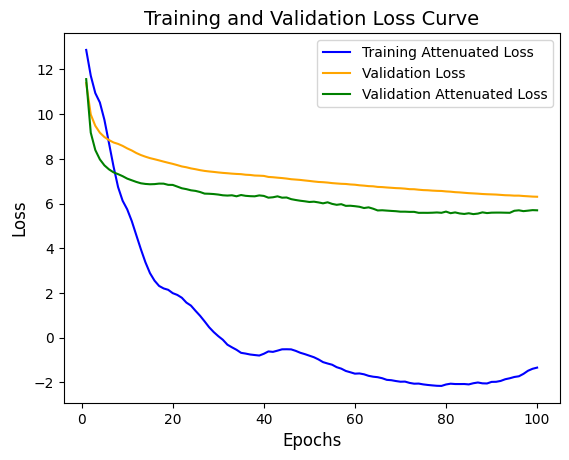

In [8]:
import matplotlib.pyplot as plt

# After training is finished, plot the loss curves
plt.plot(range(1, num_epochs+1), train_attenuated_losses, label='Training Attenuated Loss', color='blue')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss', color='orange')
plt.plot(range(1, num_epochs+1), val_attenuated_losses, label='Validation Attenuated Loss', color='green')
# Labeling x and y axes
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
# Adding title
plt.title('Training and Validation Loss Curve', fontsize=14)
# Adding legend
plt.legend()
# Show the plot
plt.show()